In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#partitioning
from sklearn.model_selection import train_test_split

#decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

#hyperparameters selection
from sklearn.model_selection import cross_val_score

#randomized search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#roc plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

## Preprocessing

In [5]:
dataframe=pd.read_csv("file_train_senza_outliers.csv", skipinitialspace=True )

In [6]:
genres = sorted(dataframe['genre'].unique())
genres_mapping = dict(zip(genres, range(0, len(genres) + 1)))
dataframe['genres_val'] = dataframe['genre'].map(genres_mapping).astype(int)

In [7]:
expl = sorted(dataframe['explicit'].unique())
expl_mapping = dict(zip(expl, range(0, len(expl) + 1)))
dataframe['explicit_val'] = dataframe['explicit'].map(expl_mapping).astype(int)

In [8]:
dataframe.head()

Unnamed: 0                                  name  duration_ms  explicit  \
0           0                             Long Road       241.76     False   
1           1  Daniâl My Son, Where Did You Vanish?       444.00     False   
2           2                    Ondskapens Galakse       333.51     False   
3           3                       Can't Look Away       269.80     False   
4           4                         Thunderground       307.65     False   

                  artists              album_name  danceability  energy  key  \
0           Funki Porcini           Hed Phone Sex          0.69    0.51    5   
1           Siavash Amini    A Trail of Laughters          0.07    0.20    1   
2               Kvelertak              Nattesferd          0.36    0.85    2   
3       The Wood Brothers       One Drop of Truth          0.52    0.58    5   
4  The Darkraver;DJ Vince  Happy Hardcore Top 100          0.64    0.69    7   

   loudness  ...  liveness  valence   tempo  time_signature  n_beats  n_bars  \
0    -12.53  ...      0.28     0.64  142.22             4.0    567.0   141.0   
1    -24.80  ...      0.36     0.03   75.60             4.0    617.0   155.0   
2     -7.44  ...      0.26     0.49  116.63             4.0    652.0   162.0   
3     -5.61  ...      0.12     0.38  140.88             4.0    619.0   155.0   
4    -11.34  ...      0.30     0.64  143.96             4.0    733.0   183.0   

   processing        genre  genres_val  explicit_val  
0        1.28      j-dance          13             0  
1        2.37      iranian          12             0  
2        3.70  black-metal           1             0  
3        1.28    bluegrass           2             0  
4        4.07        happy           8             0  

[5 rows x 24 columns]

In [9]:
df=dataframe.drop(['name', 'explicit', 'artists','album_name', 'genre'], axis=1)

In [10]:
df=df.drop(columns=df.columns[0], axis=1)

In [11]:
df.head()

duration_ms  danceability  energy  key  loudness  mode  speechiness  \
0       241.76          0.69    0.51    5    -12.53   1.0         0.10   
1       444.00          0.07    0.20    1    -24.80   0.0         0.08   
2       333.51          0.36    0.85    2     -7.44   1.0         0.04   
3       269.80          0.52    0.58    5     -5.61   1.0         0.08   
4       307.65          0.64    0.69    7    -11.34   1.0         0.05   

   acousticness  instrumentalness  liveness  valence   tempo  time_signature  \
0          0.30              0.54      0.28     0.64  142.22             4.0   
1          0.28              0.93      0.36     0.03   75.60             4.0   
2          0.00              0.80      0.26     0.49  116.63             4.0   
3          0.07              0.00      0.12     0.38  140.88             4.0   
4          0.00              0.10      0.30     0.64  143.96             4.0   

   n_beats  n_bars  processing  genres_val  explicit_val  
0    567.0   141.0        1.28          13             0  
1    617.0   155.0        2.37          12             0  
2    652.0   162.0        3.70           1             0  
3    619.0   155.0        1.28           2             0  
4    733.0   183.0        4.07           8             0

# Energy

## Creazione dataframe con bin

In [12]:
df_energy=df.copy()

def energy_mapping(energy):
    if energy <= 0.5:
        return 'Poco energetico'
    else:
        return 'Molto energetico'

df_energy['energy_map'] = df_energy['energy'].apply(lambda x: energy_mapping(x))

In [13]:
df_energy=df_energy.drop(["energy"], axis=1)

In [14]:
df_energy.head()

duration_ms  danceability  key  loudness  mode  speechiness  acousticness  \
0       241.76          0.69    5    -12.53   1.0         0.10          0.30   
1       444.00          0.07    1    -24.80   0.0         0.08          0.28   
2       333.51          0.36    2     -7.44   1.0         0.04          0.00   
3       269.80          0.52    5     -5.61   1.0         0.08          0.07   
4       307.65          0.64    7    -11.34   1.0         0.05          0.00   

   instrumentalness  liveness  valence   tempo  time_signature  n_beats  \
0              0.54      0.28     0.64  142.22             4.0    567.0   
1              0.93      0.36     0.03   75.60             4.0    617.0   
2              0.80      0.26     0.49  116.63             4.0    652.0   
3              0.00      0.12     0.38  140.88             4.0    619.0   
4              0.10      0.30     0.64  143.96             4.0    733.0   

   n_bars  processing  genres_val  explicit_val        energy_map  
0   141.0        1.28          13             0  Molto energetico  
1   155.0        2.37          12             0   Poco energetico  
2   162.0        3.70           1             0  Molto energetico  
3   155.0        1.28           2             0  Molto energetico  
4   183.0        4.07           8             0  Molto energetico

In [15]:
df_energy_wo=df_energy.drop(["danceability", "acousticness", "genres_val"], axis=1)

In [16]:
X = df_energy_wo.drop(["energy_map"], axis=1)
Y = np.array(df_energy_wo['energy_map'])

# Energy full
## Hyperparameters selection

In [19]:
attributes = [col for col in df_energy.columns if col != 'energy_map']
X = df_energy[attributes].values
y = df_energy['energy_map']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

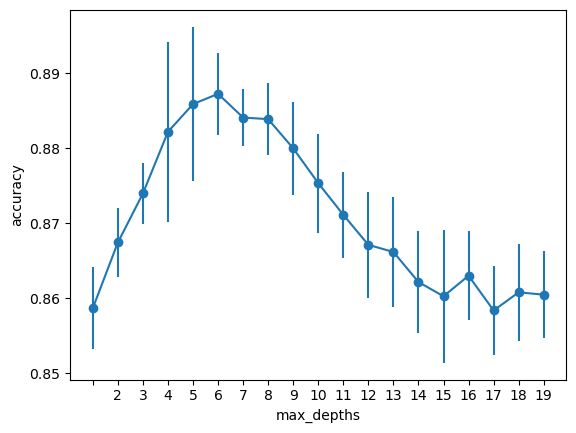

In [28]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

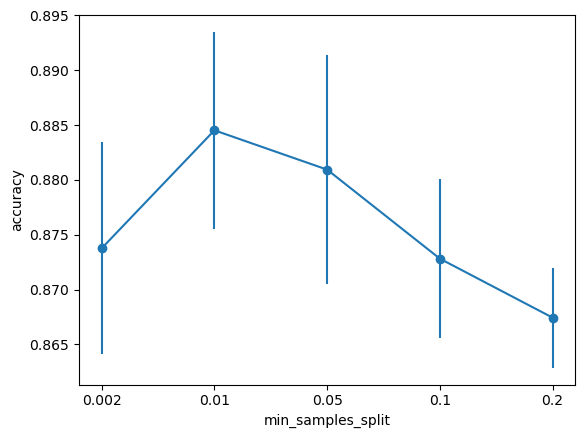

In [29]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

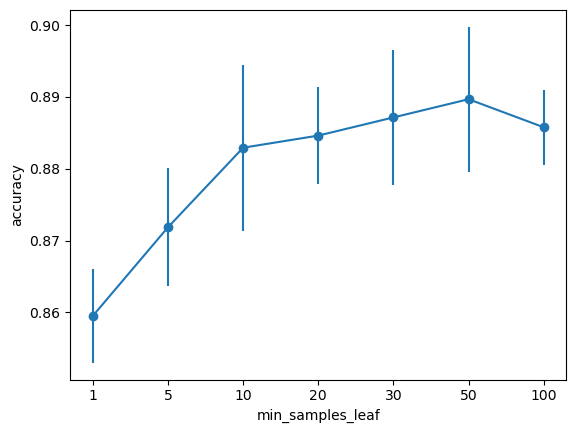

In [30]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

## Decision tree

In [31]:
dt = DecisionTreeClassifier(min_samples_split=0.01, min_samples_leaf=50, max_depth=6, criterion="gini")

In [32]:
%%time
dt.fit(X_train, y_train)

Wall time: 39.8 ms


DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=0.01)

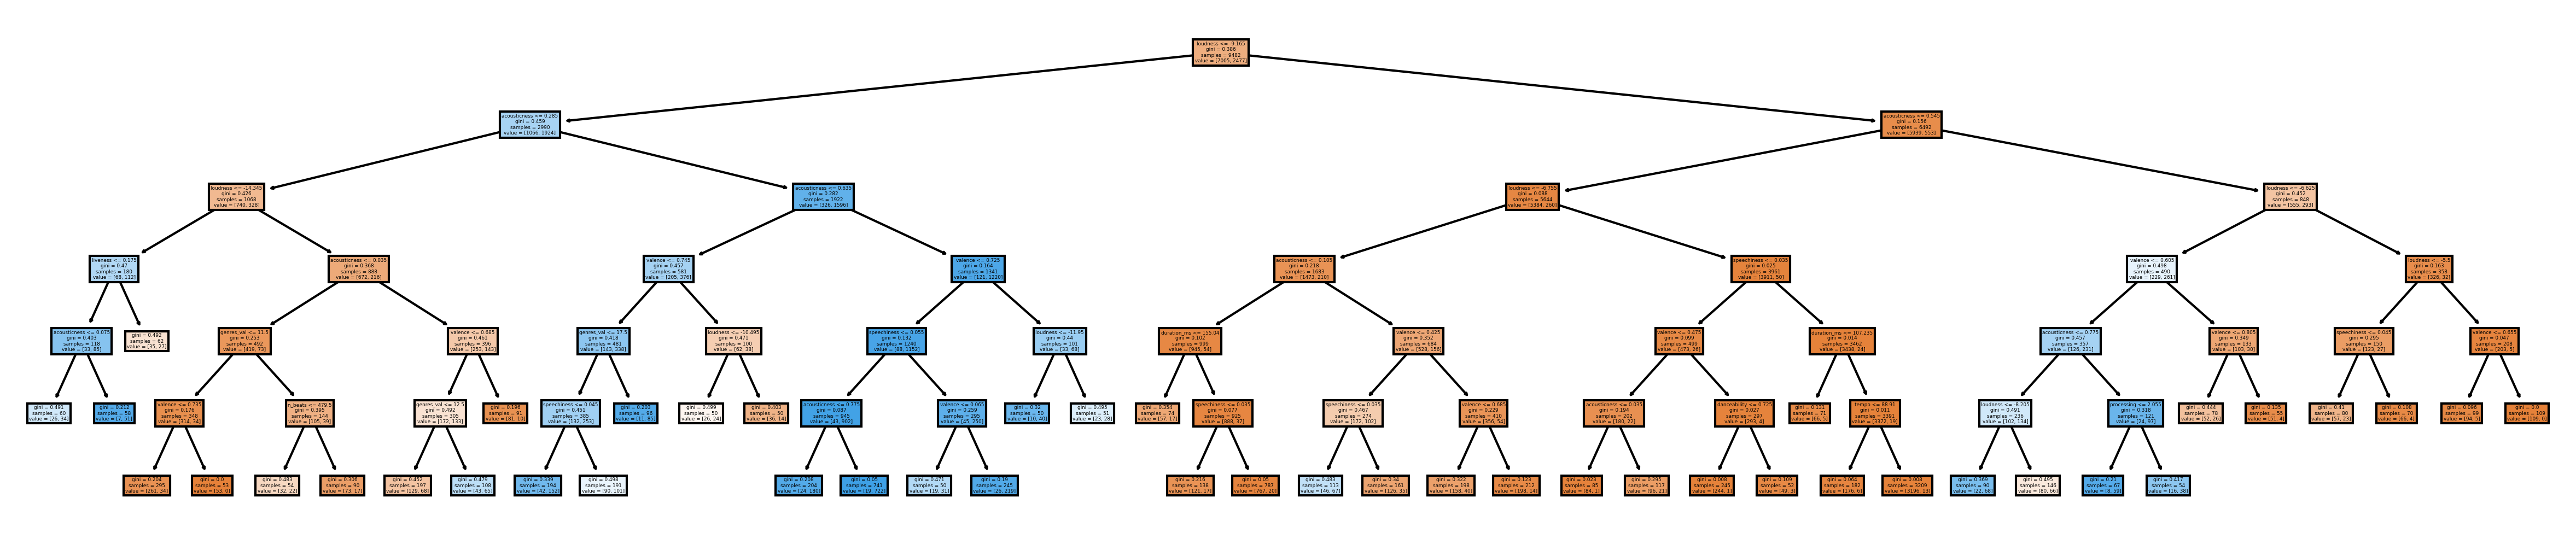

In [33]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

In [34]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [35]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.8978063699641425
Train F1-score [0.93134963 0.80016498]

Test Accuracy 0.8789667896678967
Test F1-score [0.91910556 0.75976562]


In [36]:
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

Molto energetico       0.91      0.93      0.92      3003
 Poco energetico       0.79      0.73      0.76      1062

        accuracy                           0.88      4065
       macro avg       0.85      0.83      0.84      4065
    weighted avg       0.88      0.88      0.88      4065



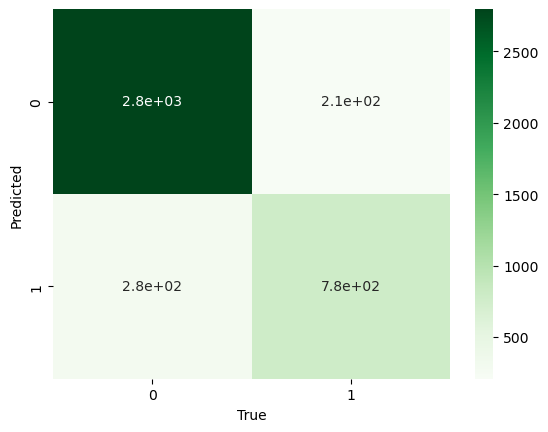

In [37]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [38]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

loudness 0.6360008754329821
acousticness 0.2757125919801537
valence 0.05082354446660252
speechiness 0.019456573843997464
genres_val 0.010223423629274723
liveness 0.00289344178782679
duration_ms 0.002420286554879587
n_beats 0.0014138905576476116
processing 0.0008208646191609309
tempo 0.0001263435477381577
danceability 0.00010816357973647125
key 0.0
mode 0.0
instrumentalness 0.0
time_signature 0.0
n_bars 0.0
explicit_val 0.0


## Randomized search

In [39]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

Wall time: 1min 6s


In [40]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 50, 'max_depth': 12, 'criterion': 'gini'} 0.8877241880917904


In [41]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.8978063699641425
Train F1-score [0.93134963 0.80016498]

Test Accuracy 0.8789667896678967
Test F1-score [0.91910556 0.75976562]


In [42]:
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

Molto energetico       0.91      0.93      0.92      3003
 Poco energetico       0.79      0.73      0.76      1062

        accuracy                           0.88      4065
       macro avg       0.85      0.83      0.84      4065
    weighted avg       0.88      0.88      0.88      4065



In [43]:
results = pd.DataFrame(random_search.cv_results_)

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

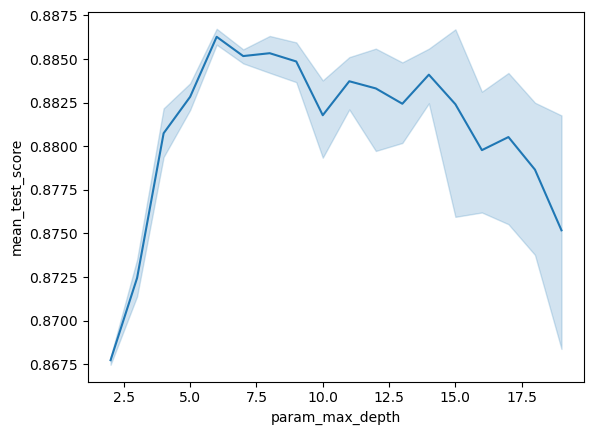

In [44]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

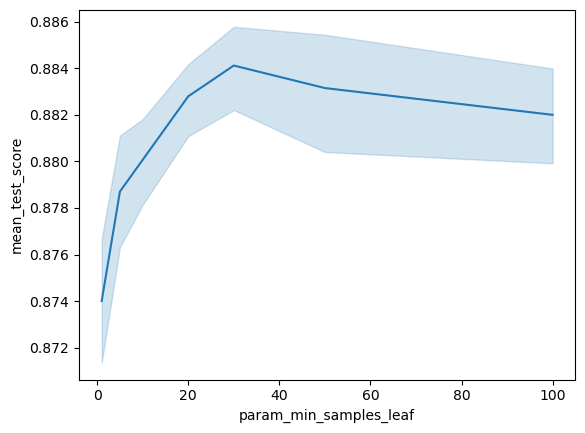

In [45]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [46]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

loudness 0.6182215820525121
acousticness 0.2717715571682979
valence 0.05159099956956917
speechiness 0.022183146678784803
genres_val 0.015839776689368475
instrumentalness 0.004170698143326919
liveness 0.0036407292311078556
danceability 0.0030734019943179057
n_beats 0.0028774706269090625
duration_ms 0.002530463427860877
tempo 0.0012194142257140512
processing 0.0011548083248649828
key 0.0010656638792550484
n_bars 0.0005901035112860765
time_signature 7.01844768249945e-05
mode 0.0
explicit_val 0.0


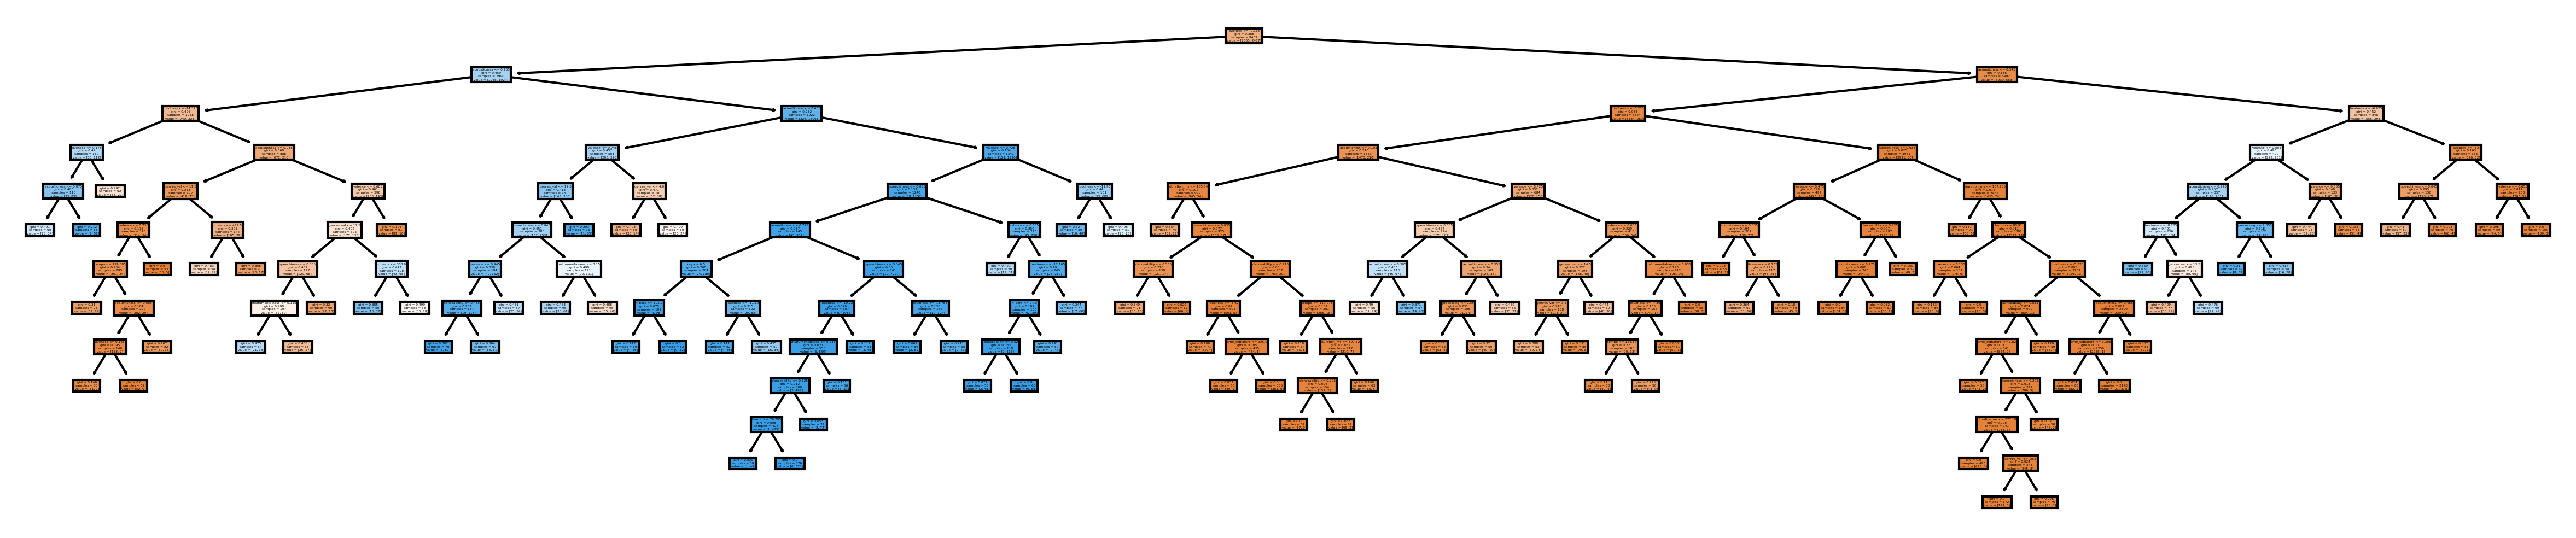

In [47]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(clf, feature_names=attributes, filled=True)
plt.show()

## CCAlpha

In [48]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

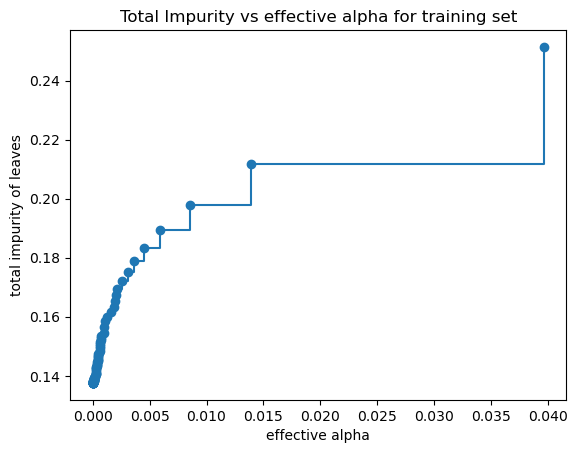

In [49]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [50]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1345890109426744


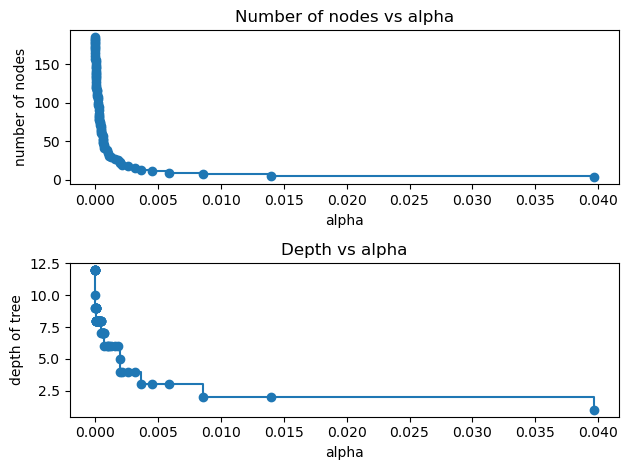

In [51]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

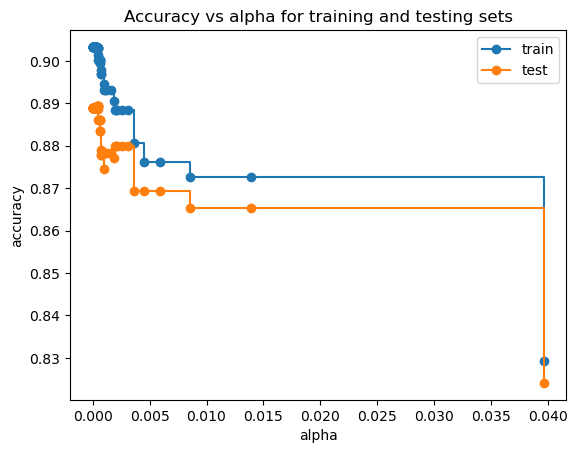

In [52]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [53]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006, **random_search.best_params_)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, max_depth=12, min_samples_leaf=50,
                       min_samples_split=5, random_state=0)

In [54]:
y_test_pred = dtp.predict(X_test)

In [55]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.8978063699641425
Train F1-score [0.93134963 0.80016498]

Test Accuracy 0.8693726937269373
Test F1-score [0.91244847 0.74285714]


In [56]:
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

Molto energetico       0.90      0.92      0.91      3003
 Poco energetico       0.76      0.72      0.74      1062

        accuracy                           0.87      4065
       macro avg       0.83      0.82      0.83      4065
    weighted avg       0.87      0.87      0.87      4065



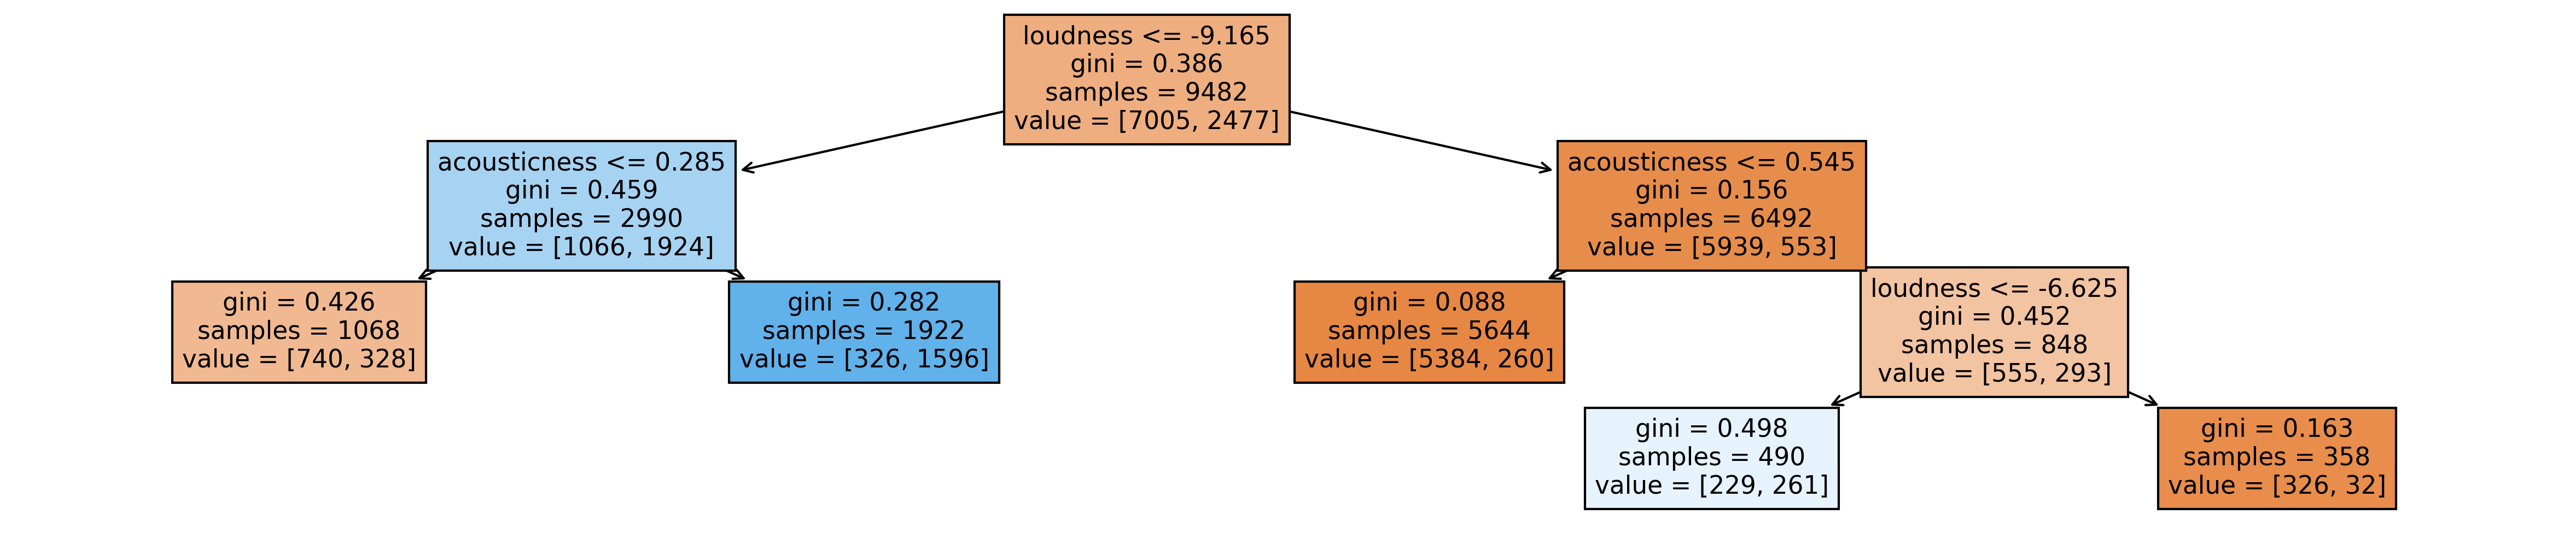

In [57]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True)
plt.show()

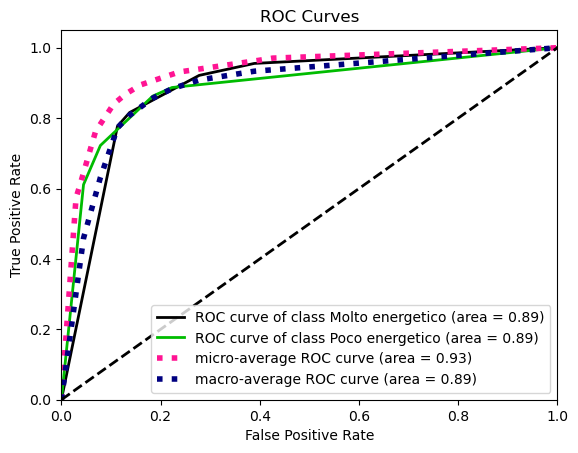

In [58]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

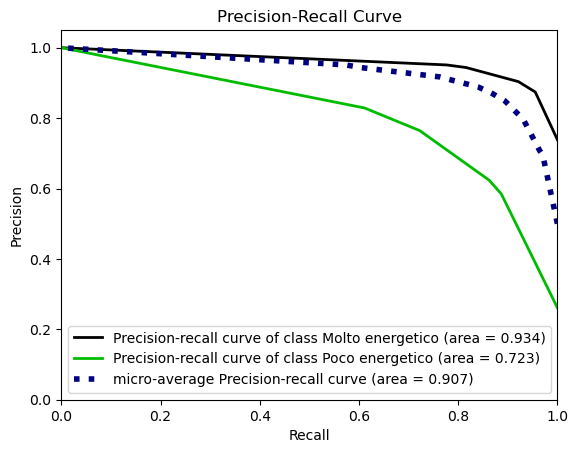

In [59]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()

# Energy wo
## Hyperparameters selection

In [60]:
attributes = [col for col in df_energy_wo.columns if col != 'energy_map']
X = df_energy_wo[attributes].values
y = df_energy_wo['energy_map']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

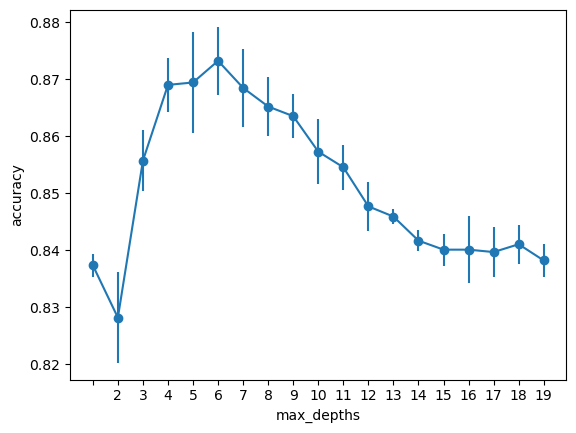

In [62]:
max_depths = [None] + list(np.arange(2, 20))
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

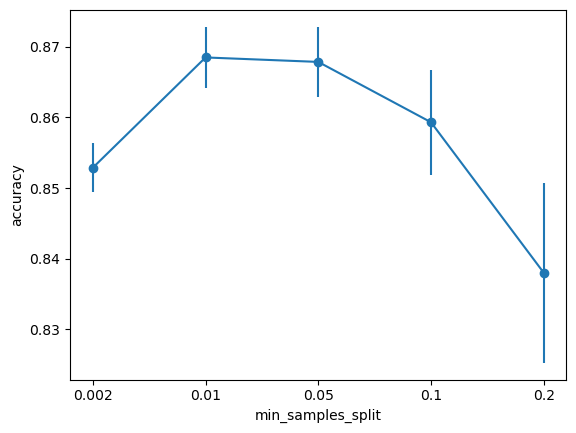

In [63]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

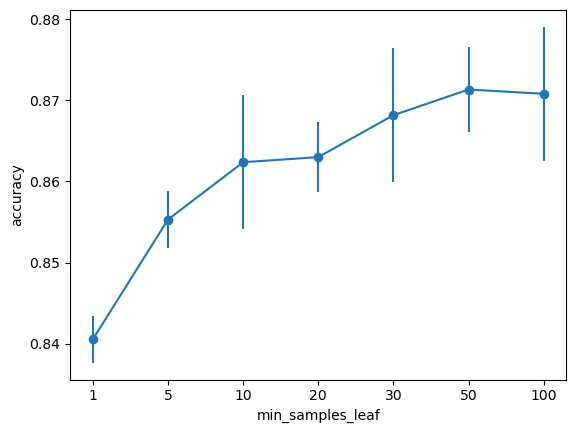

In [64]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

## Decision tree

In [65]:
dt = DecisionTreeClassifier(min_samples_split=0.01, min_samples_leaf=50, max_depth=6, criterion="gini")

In [66]:
%%time
dt.fit(X_train, y_train)

Wall time: 33.3 ms


DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=0.01)

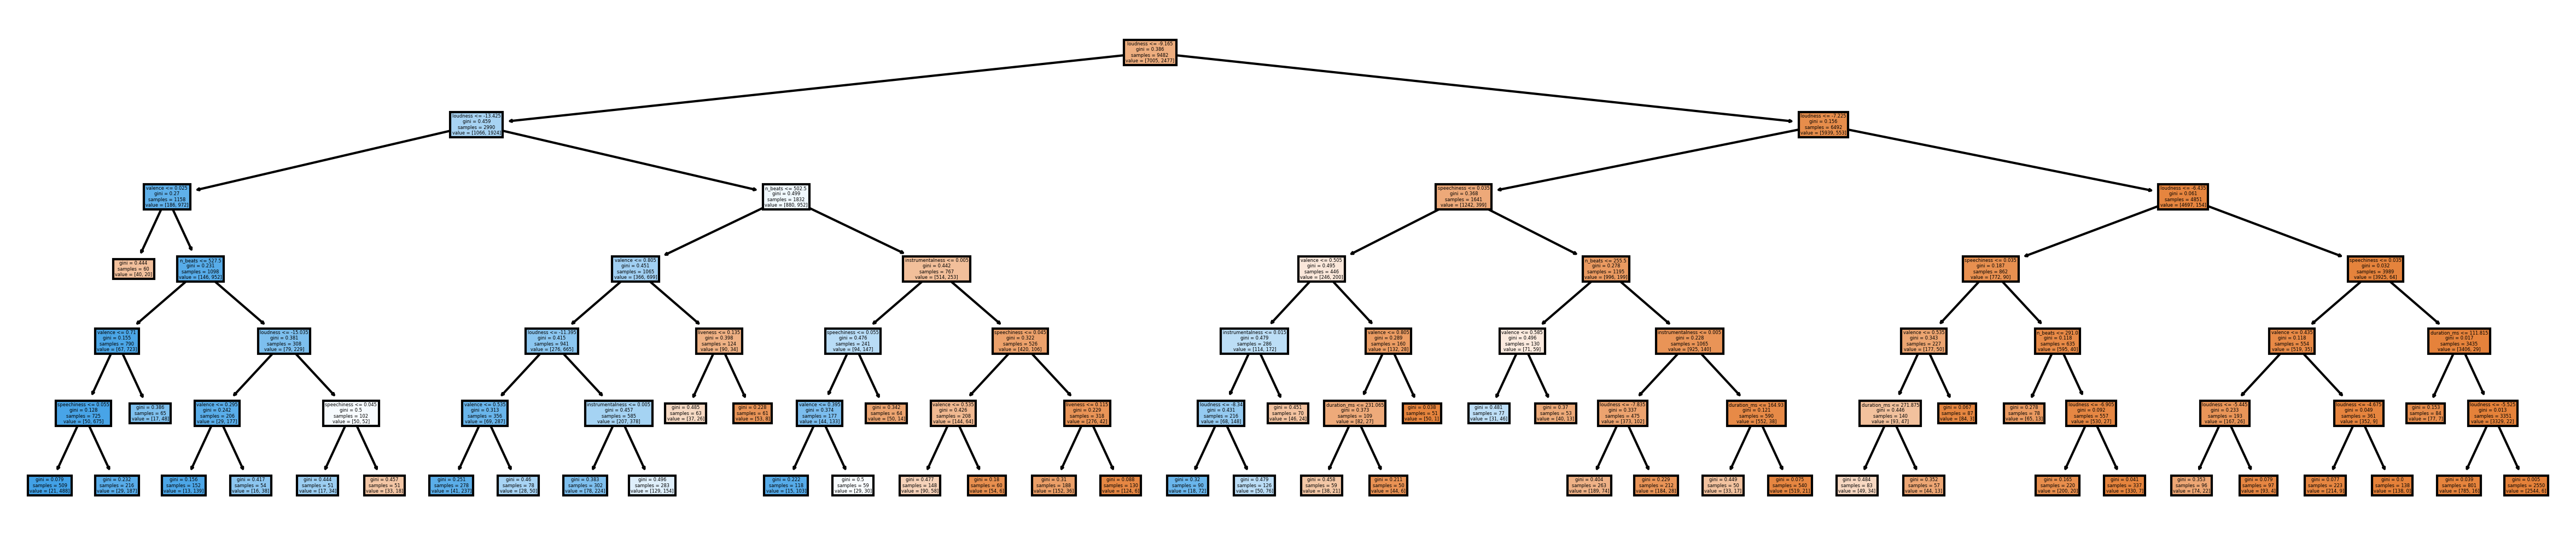

In [67]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=attributes, filled=True)
plt.show()

In [68]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [69]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.885783589959924
Train F1-score [0.92280277 0.78054711]

Test Accuracy 0.8738007380073801
Test F1-score [0.91505216 0.75466284]


In [70]:
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

Molto energetico       0.91      0.92      0.92      3003
 Poco energetico       0.77      0.74      0.75      1062

        accuracy                           0.87      4065
       macro avg       0.84      0.83      0.83      4065
    weighted avg       0.87      0.87      0.87      4065



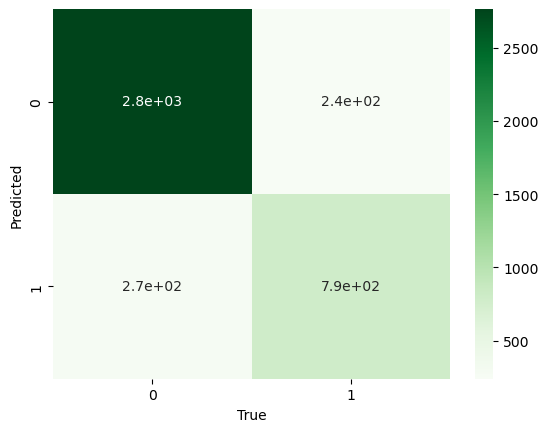

In [71]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [72]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

loudness 0.7534760818110997
valence 0.07893942355731436
n_beats 0.06377134701257148
speechiness 0.04984463927364378
instrumentalness 0.043190789845553565
duration_ms 0.0068974442763346765
liveness 0.003880274223482377
key 0.0
mode 0.0
tempo 0.0
time_signature 0.0
n_bars 0.0
processing 0.0
explicit_val 0.0


## Randomized search

In [73]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

Wall time: 58.6 s


In [74]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 100, 'min_samples_leaf': 30, 'max_depth': 18, 'criterion': 'entropy'} 0.8768400694856859


In [75]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.885783589959924
Train F1-score [0.92280277 0.78054711]

Test Accuracy 0.8738007380073801
Test F1-score [0.91505216 0.75466284]


In [76]:
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

Molto energetico       0.91      0.92      0.92      3003
 Poco energetico       0.77      0.74      0.75      1062

        accuracy                           0.87      4065
       macro avg       0.84      0.83      0.83      4065
    weighted avg       0.87      0.87      0.87      4065



In [77]:
results = pd.DataFrame(random_search.cv_results_)

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

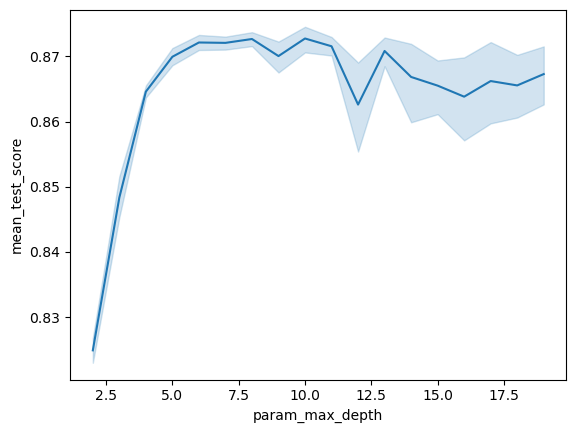

In [78]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

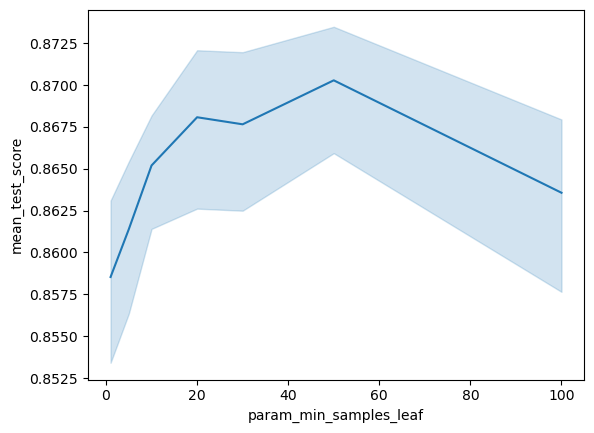

In [79]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

In [80]:
zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

loudness 0.6936008981709185
valence 0.08395339607573529
instrumentalness 0.05986251945510545
speechiness 0.051561389749207535
n_beats 0.04279217978239213
duration_ms 0.024817447025043706
tempo 0.019225135928043167
liveness 0.007211075212527035
time_signature 0.006388091462247298
processing 0.006283172789150593
n_bars 0.0035380769557307864
key 0.0007666173938985168
mode 0.0
explicit_val 0.0


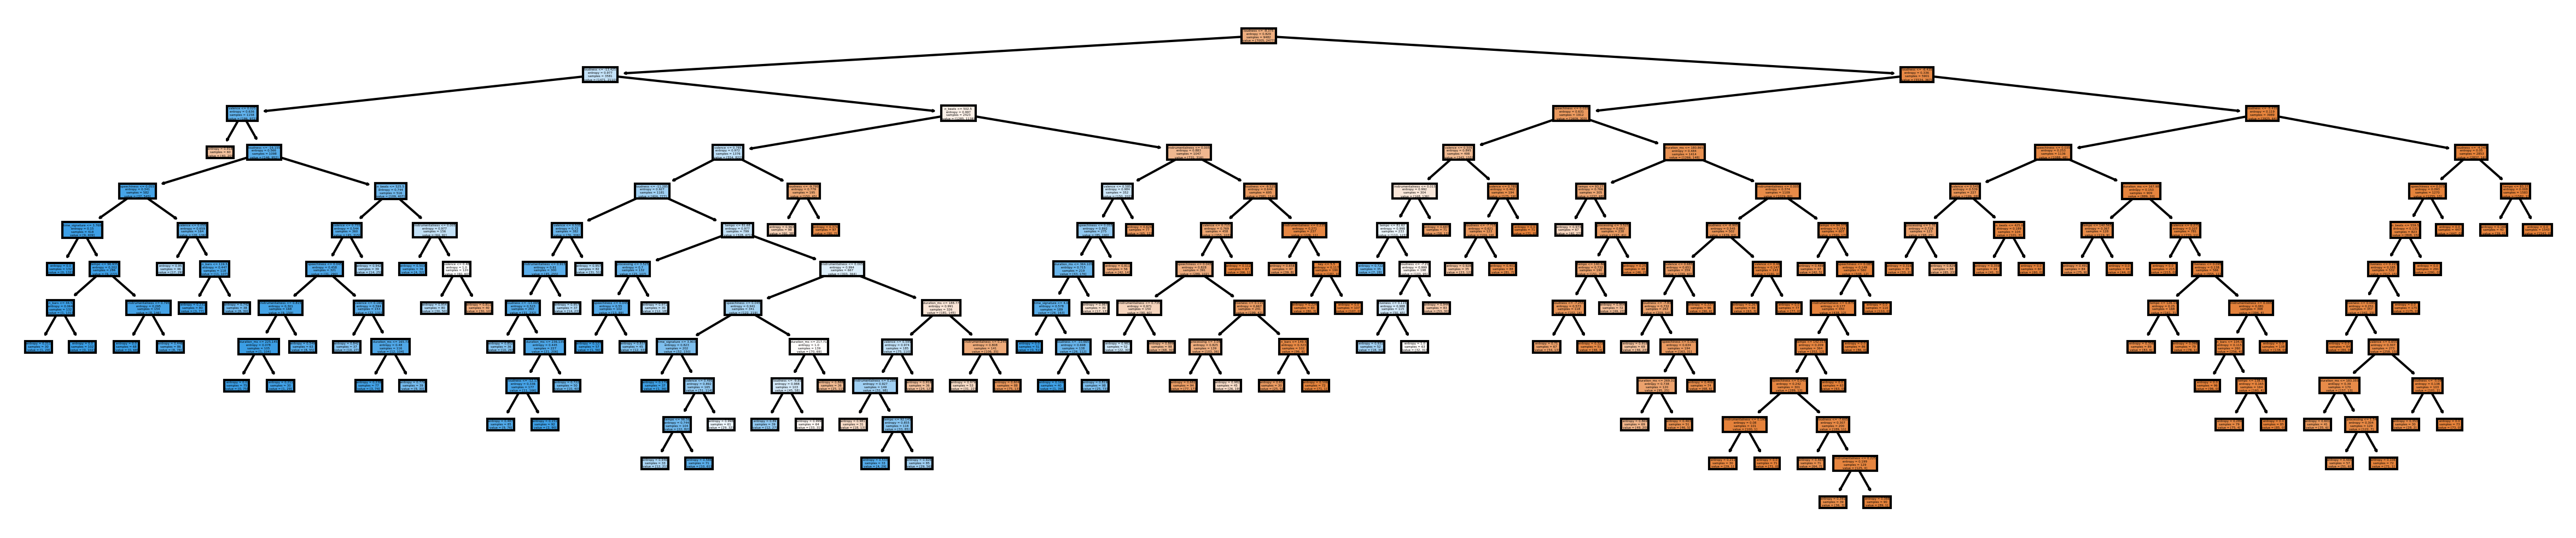

In [81]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(clf, feature_names=attributes, filled=True)
plt.show()

## CCAlpha

In [82]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

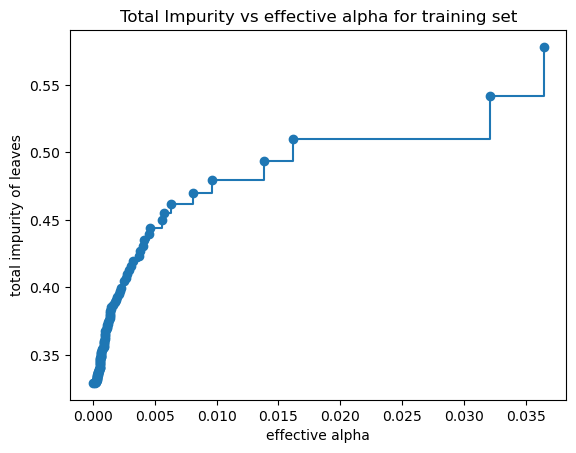

In [83]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [84]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2504970697274771


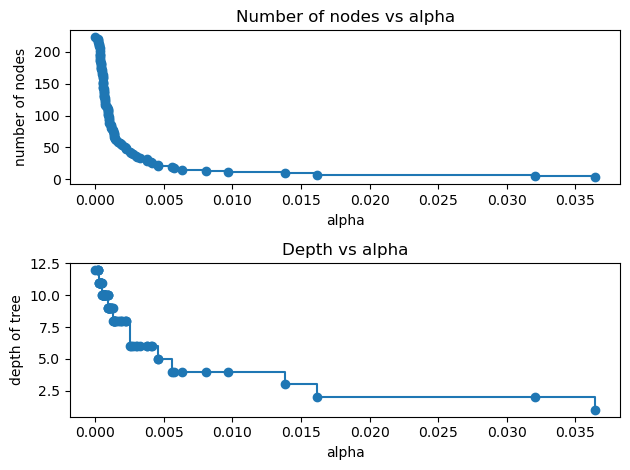

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

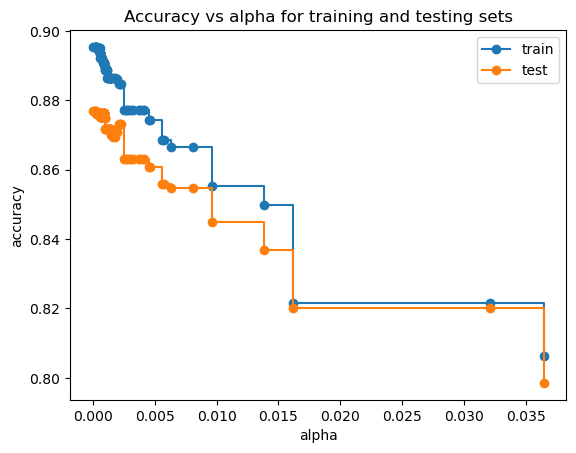

In [86]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
dtp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006, **random_search.best_params_)
dtp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, criterion='entropy', max_depth=18,
                       min_samples_leaf=30, min_samples_split=100,
                       random_state=0)

In [88]:
y_test_pred = dtp.predict(X_test)

In [89]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.885783589959924
Train F1-score [0.92280277 0.78054711]

Test Accuracy 0.8558425584255842
Test F1-score [0.90161182 0.73045078]


In [90]:
print(classification_report(y_test, y_test_pred))

                  precision    recall  f1-score   support

Molto energetico       0.91      0.89      0.90      3003
 Poco energetico       0.71      0.75      0.73      1062

        accuracy                           0.86      4065
       macro avg       0.81      0.82      0.82      4065
    weighted avg       0.86      0.86      0.86      4065



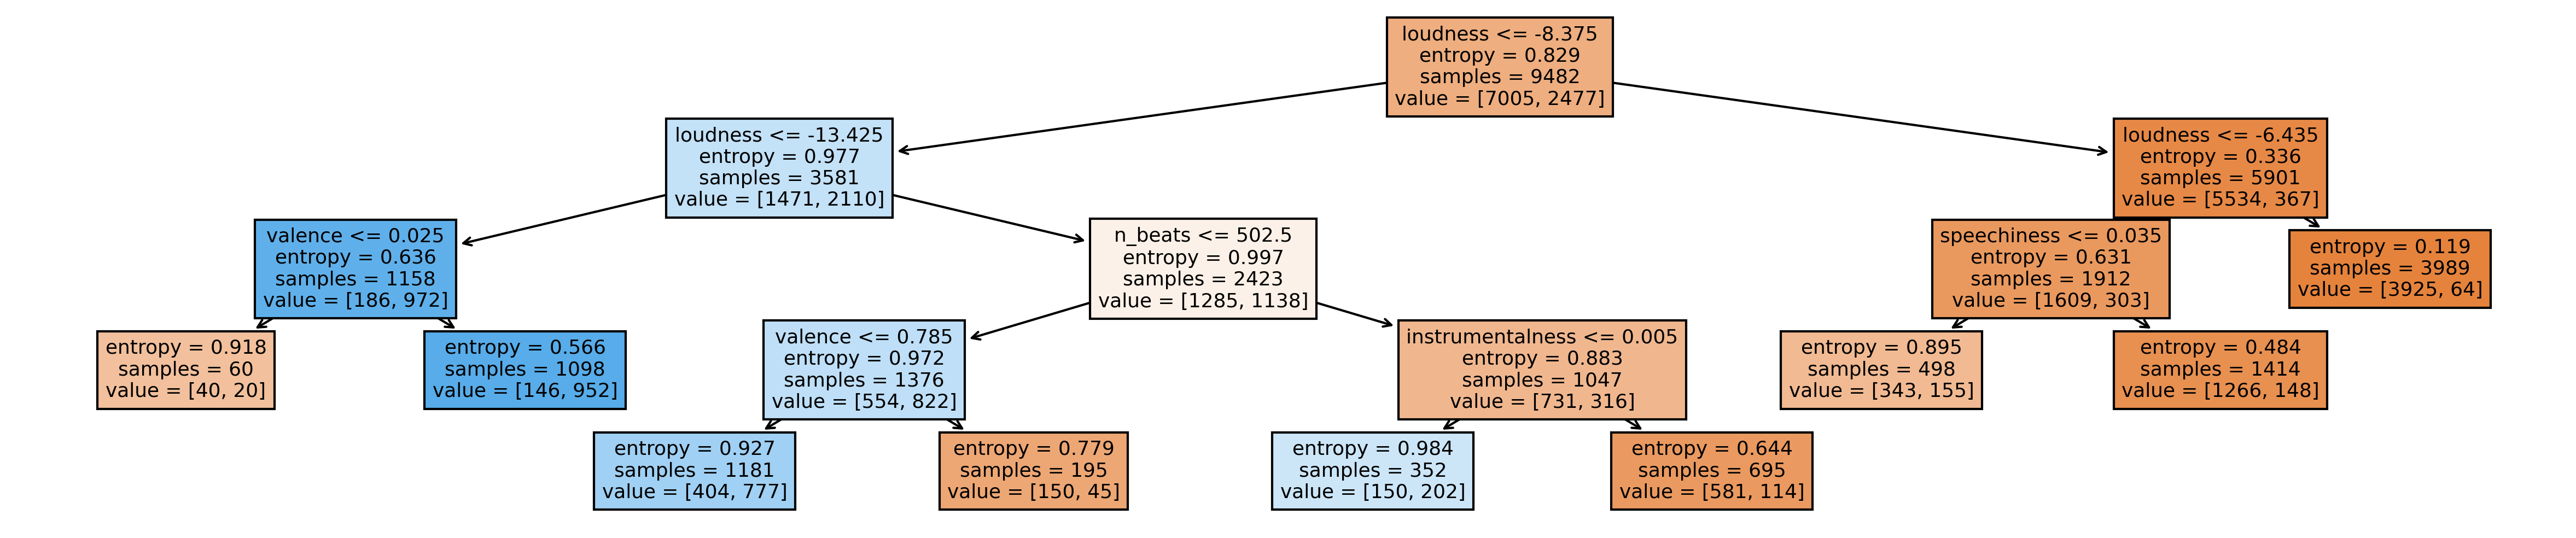

In [91]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dtp, feature_names=attributes, filled=True)
plt.show()

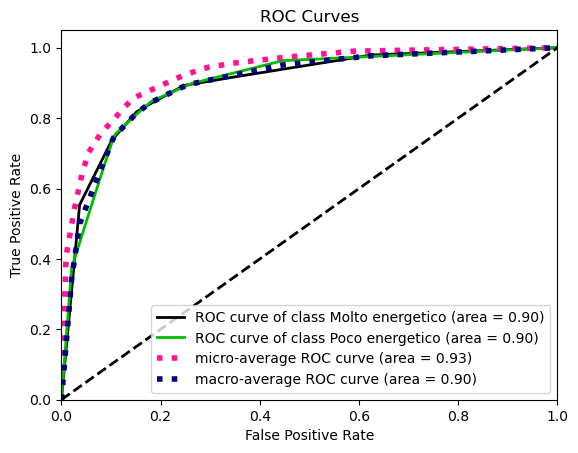

In [92]:
plot_roc(y_test, dtp.predict_proba(X_test))
plt.show()

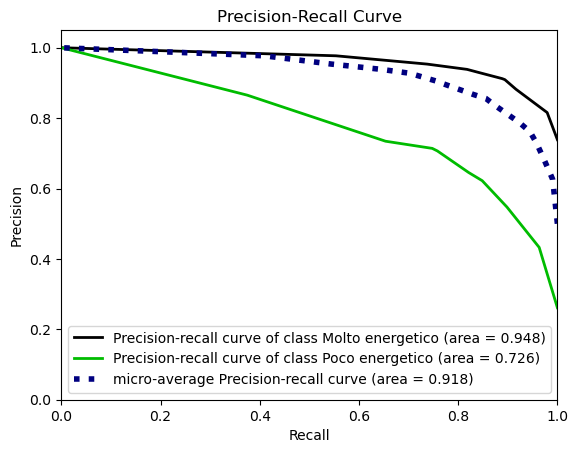

In [93]:
plot_precision_recall(y_test, dtp.predict_proba(X_test))
plt.show()